In [ ]:
import pandas as pd
import time
import numpy as np
import sys
import argparse
import json
import random
import re
import string
import pandas as pd
import time

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
tipo = "Roberta"

In [95]:
def split_dataframe(file):
  LLMs = ["BARD", "CLAUDE", "GPT", "LAMA"]
  list_df = []

  for llm in LLMs:

    df = pd.read_csv(file+llm+"/predictions_"+llm+".csv",sep=",")
    df = df.sample(frac=1).reset_index(drop=True)

    # list_df.append((df.drop(labels=["ID", "Finetune_Roberta_Model_Probability"], axis=1), llm))
    list_df.append((df.drop(labels=["ID", f"Finetune_{tipo}_Model_Probability"], axis=1), llm))


    return list_df

In [97]:
path = "/content/drive/MyDrive/2. Pubblicazioni/3. In Corso/2. Identifying Fake Reviews for Refund Purposes/4. comparative evaluation among PARROT and state-of-the-art models/FakeRoberta/"

In [98]:
list_df = split_dataframe(f"{path}Result/Dataset_")
len(list_df)

1

# Confusion Matrix

In [99]:
path_result = f"{path}Result/Dataset_"

In [100]:
import torch
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,f1_score

In [101]:
def conf_matrix(y_true, y_pred, model):
    Accuracy = metrics.accuracy_score(y_true, y_pred)
    Precision = metrics.precision_score(y_true, y_pred, labels=["Real", "Fake"])
    Sensitivity_recall = metrics.recall_score(y_true, y_pred, labels=["Real", "Fake"])
    F1_score = metrics.f1_score(y_true, y_pred, labels=["Real", "Fake"])

    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=["Real", "Fake"])

    plt.rcParams["figure.figsize"] = (10,10)

    cm_display.plot(cmap=plt.cm.Greens, colorbar=False)
    plt.xticks(rotation = 90)

    print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall, "F1_score":F1_score})
    plt.tight_layout()

    plt.savefig(f"{path_result}{model}/confusion-matrix_{model}.pdf")

    evaluation_report = classification_report(y_true, y_pred, labels=[0,1], target_names=["Real","Fake"])
    print(evaluation_report)

    with open(f"{path_result}{model}/{tipo}_predictions_{model}.txt", "w") as f:
      f.write(f"{evaluation_report}\nMetrics:\nAccuracy_score: {Accuracy}\nPrecision_score: {Precision}\nRecall_score: {Sensitivity_recall}\nF1_Score: {F1_score}")

# BARD

BARD
{'Accuracy': 0.48444700460829493, 'Precision': 0.4892601431980907, 'Sensitivity_recall': 0.7085253456221198, 'F1_score': 0.5788235294117647}
              precision    recall  f1-score   support

        Real       0.47      0.26      0.34       868
        Fake       0.49      0.71      0.58       868

    accuracy                           0.48      1736
   macro avg       0.48      0.48      0.46      1736
weighted avg       0.48      0.48      0.46      1736



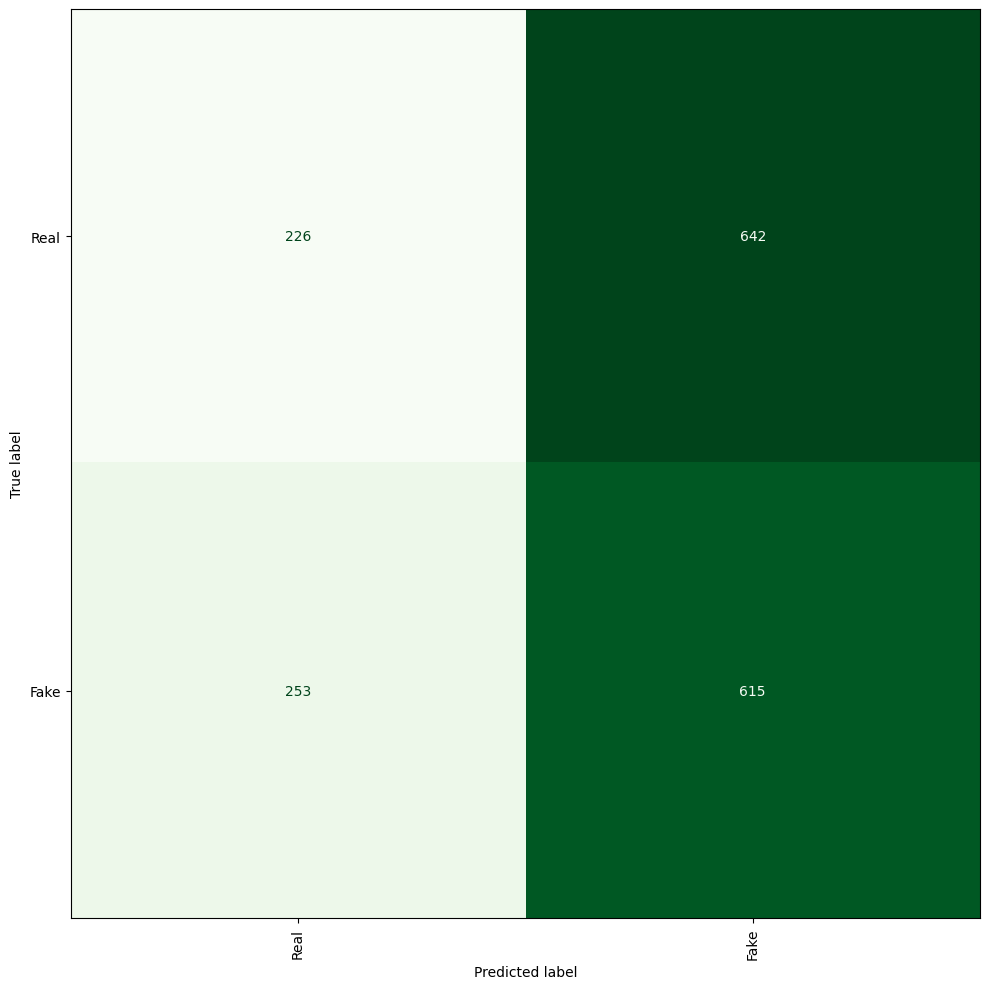

In [102]:
df_BARD = list_df[0][0]
model = list_df[0][1]

print(model)

conf_matrix(y_true= df_BARD["Original_Label"], y_pred= df_BARD[f"Finetune_{tipo}_Model_Prediction"] ,model= model)

# Claude

CLAUDE
{'Accuracy': 0.49827188940092165, 'Precision': 0.4991294254207777, 'Sensitivity_recall': 0.9907834101382489, 'F1_score': 0.663836356619066}
              precision    recall  f1-score   support

        Real       0.38      0.01      0.01       868
        Fake       0.50      0.99      0.66       868

    accuracy                           0.50      1736
   macro avg       0.44      0.50      0.34      1736
weighted avg       0.44      0.50      0.34      1736



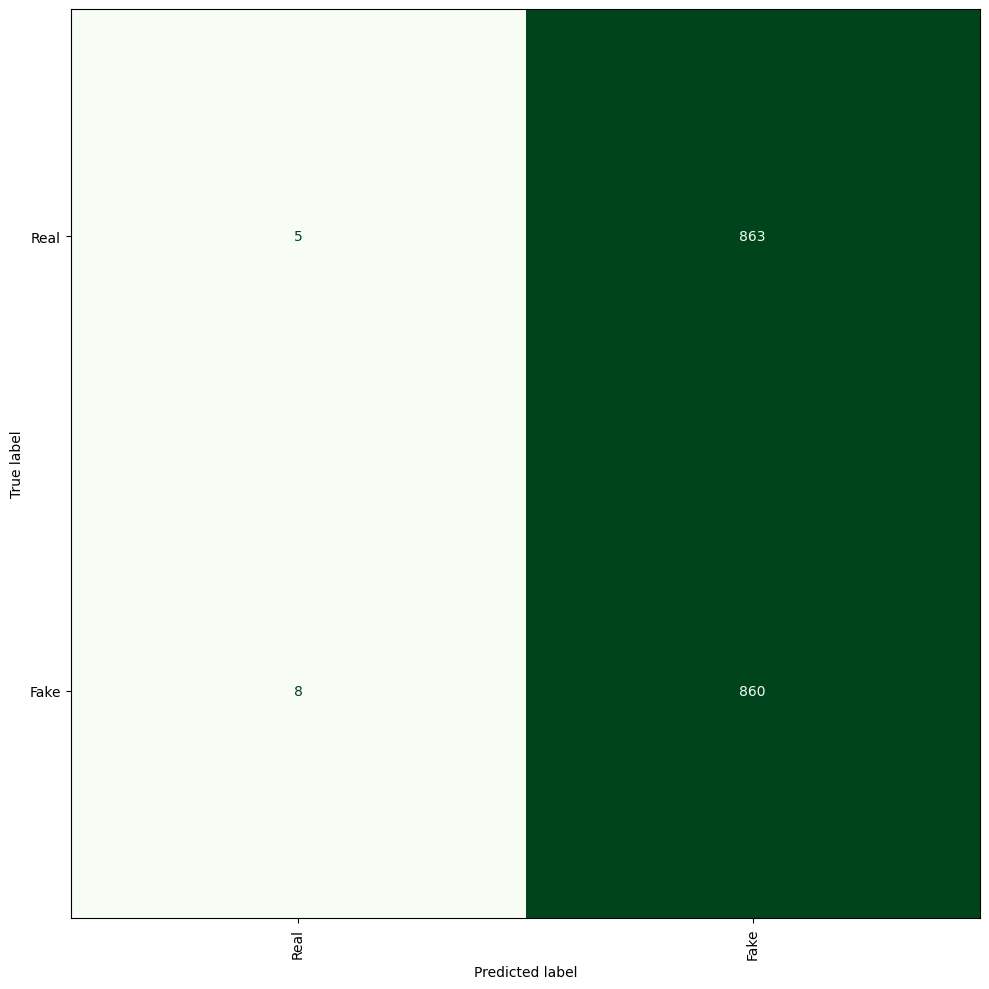

In [ ]:
df_Claude = list_df[1][0]
model = list_df[1][1]

print(model)

conf_matrix(y_true= df_Claude["Original_Label"], y_pred= df_Claude["Finetune_Roberta_Model_Prediction"] ,model= model)

# GPT

GPT
{'Accuracy': 0.5103686635944701, 'Precision': 0.5059210526315789, 'Sensitivity_recall': 0.8859447004608295, 'F1_score': 0.6440536013400334}
              precision    recall  f1-score   support

        Real       0.54      0.13      0.22       868
        Fake       0.51      0.89      0.64       868

    accuracy                           0.51      1736
   macro avg       0.52      0.51      0.43      1736
weighted avg       0.52      0.51      0.43      1736



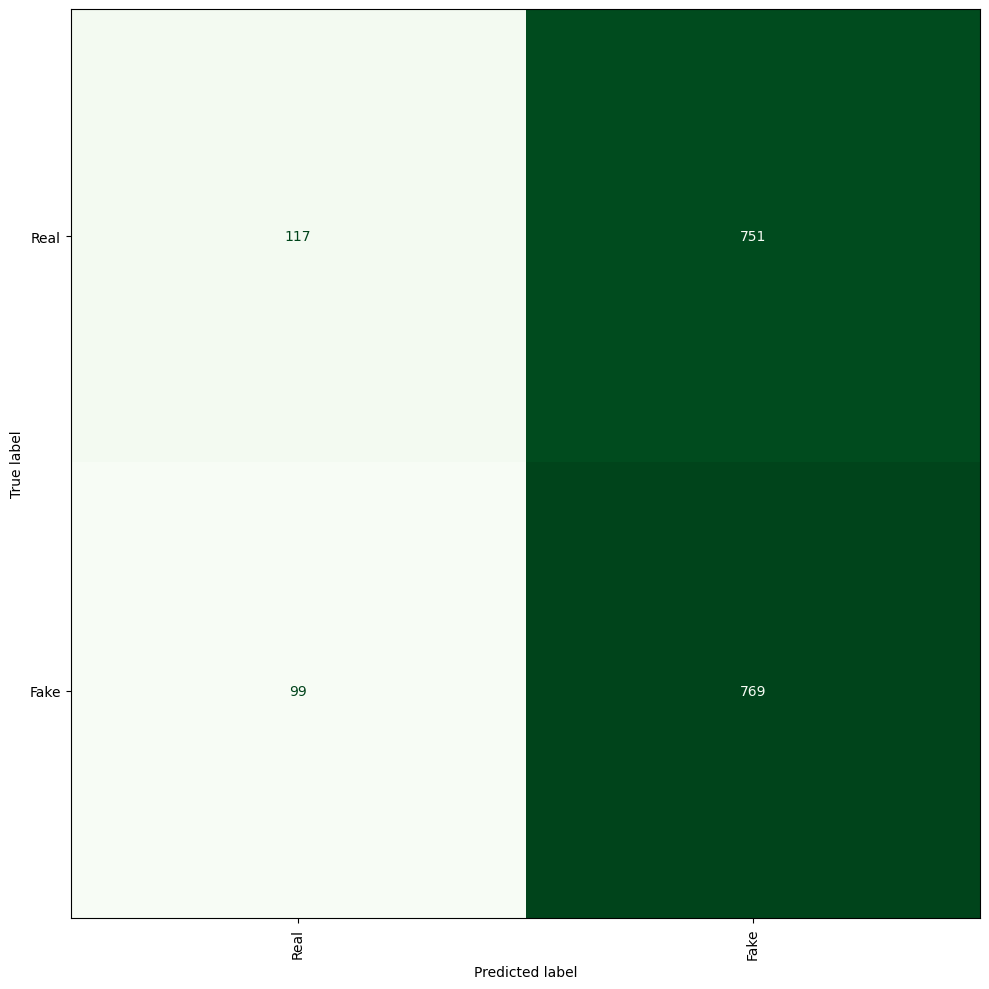

In [ ]:
df_GPT = list_df[2][0]
model = list_df[2][1]

print(model)

conf_matrix(y_true= df_GPT["Original_Label"], y_pred= df_GPT["Finetune_Roberta_Model_Prediction"] ,model= model)

# LAMA

LAMA
{'Accuracy': 0.49942396313364057, 'Precision': 0.4996059889676911, 'Sensitivity_recall': 0.7304147465437788, 'F1_score': 0.5933551708001872}
              precision    recall  f1-score   support

        Real       0.50      0.27      0.35       868
        Fake       0.50      0.73      0.59       868

    accuracy                           0.50      1736
   macro avg       0.50      0.50      0.47      1736
weighted avg       0.50      0.50      0.47      1736



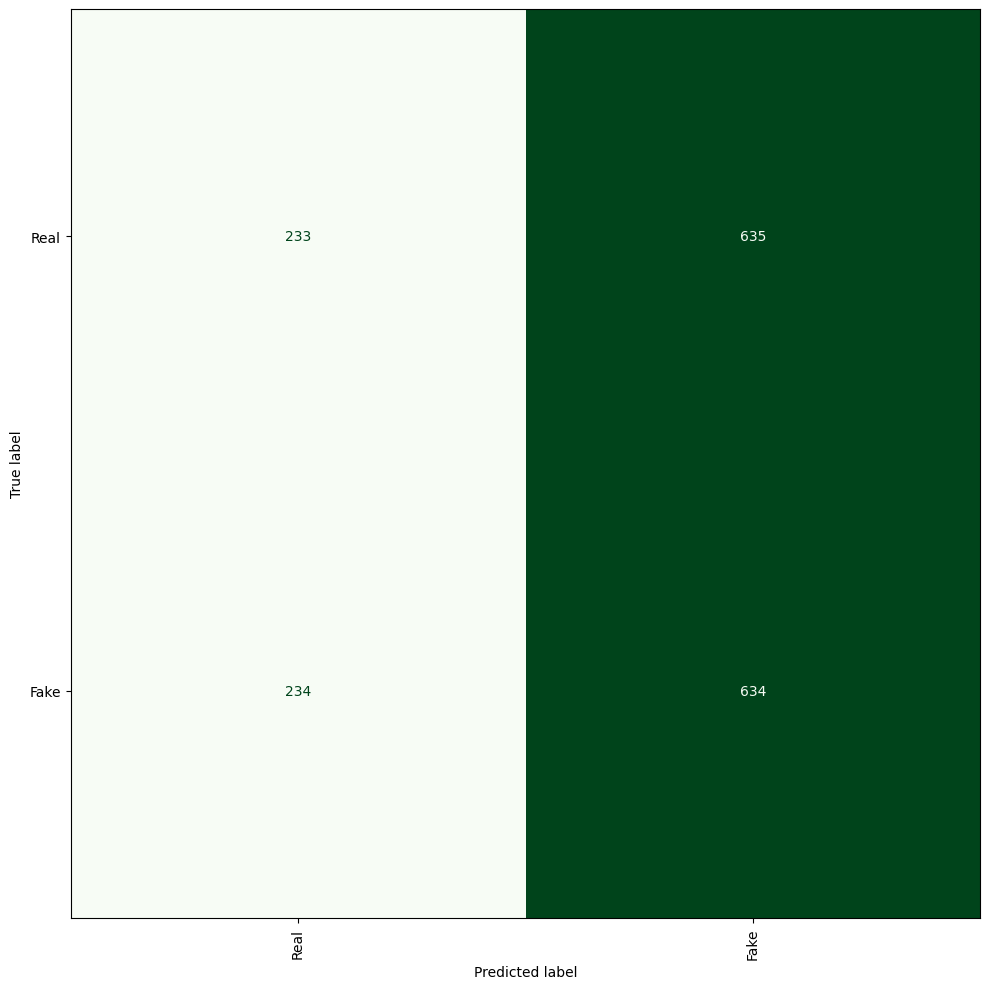

In [ ]:
df_Lama = list_df[3][0]
model = list_df[3][1]

print(model)

conf_matrix(y_true= df_Lama["Original_Label"], y_pred= df_Lama["Finetune_Roberta_Model_Prediction"] ,model= model)